## __Twitter retweet networks__

## __Contents__

1. Report\
   1.1 Introduction\
   1.2 Problem definition\
   1.3 Analysis taxonomy\
   1.4 Extracting the data\
   1.5 Creating the data model\
   1.6 Running the analysis\
   1.7 Analysis\
   1.8 Summary of findings and conclusions
   
2. References

3. Appendix\
   3.1 Set up Python packages\
   3.2 Create user defined functions\
   3.3 Create Twitter retweet networks\
   3.4 Get network statistics\
   3.5 Create network visualizations and plots

## __1. Report__

#### <font color='blue'>1.1. Introduction

This project uses network science techniques and knowledge of social media concepts to understand how social networks associated with different hashtag conversations can differ in terms of:
- Ability to diffuse information
- Node and link structure
- Presence of nefarious bot/misinformation behaviour

The social networks analysed are Twitter retweet networks.
    
A hashtag relating to a significant current event was selected from each of the domains of: sports; music; international affairs; politics; and science. It is expected that the resulting social networks for these conversations will involve different types of users engaging in the conversations and hence have different structures. For instance, hashtags for sports and music may have larger networks due to being popular cultural domains with mass media exposure and users may include influential stars of sports and music. Hashtags for international affairs, politics and science are expected to have narrower audiences and involve niche interest groups and government agencies involved in the conversations and may be more likely to involve echo chambers with some users dominating conversations.
    
The analysis undertaken by this project follows the Social Media Analytics Process approach (Ganis & Kohirkar, 2015).

#### <font color='blue'>1.2. Problem definition

Using Twitter data from different hashtag conversations the following analysis is to be undertaken:

- Create a retweet network for each hashtag conversation
- Compare the structure and properties of the networks using various network science techniques
- Identify influential and viral users
- Identify possible bot/suspicious nodes diffusing information
- Summarise insight on each network and how they all differ

The five hashtags selected are:

- #SixNations2023
- #Eurovision2023
- #ChinaSpyBalloon
- #NursesStrike
- #bard

#### <font color='blue'>1.3. Analysis taxonomy

__Depth of analysis__

This project is an ad hoc piece of analysis producing a one off piece of work. Simple social metrics alone are not enough for the required objective. To compare selected social networks the analysis requires drilling down into many metrics derived using network science techniques from which, collectively, the required insights can be derived

__Machine capacity__

As this project is only working with small data extracts from data at rest it only needs low network bandwidth and moderate CPU usage. Also data extracts will be reduced further when they are filtered down to consider retweets only

__Domain of analysis__

The content is external social media created by Twitter users available in the public domain

__Velocity of data__

Statis data at rest which has been accumulated and will then be analysed after extraction

#### <font color='blue'>1.4. Extracting the data

##### __1.4.1. Identifying hashtags__    
    
The hashtags selected for each domain were those appearing in Twitter trends on the 10th of February. Checks were made for similar hashtags which may also have been trending at this time using Twitters in-app advanced search functionality e.g. #6NationsRugby or #GuinnessSixNations instead of #SixNationsRugby2023. Data extractions from Twitter for the similar hashtags quickly showed which ones contained the most conversations. Also cross-referencing the hashtags with those used by media agencies on Twitter, such as BBC News, on Twitter also helped confirm the main hashtags for the events of interest.
    
##### __1.4.2. Extracting the data__

Data was extracted on the 10th of February. Finding the peak dates of engagement for each of the hashtag conversations is out of scope for the project so rather than capturing only the latest tweets or only the most popular tweets for each, a mixture of both was captured to ensure that the extracts are not biased either way - also there may not be enough 'popular' tweets and so recent tweets will be required to fulfill the reqired quota. This may help ameliorate the problem of timing around the different peaks for the conversations.

The following details the steps undertaken in Python to extract the required data - refer to 3.2.1 of the appendix for how this is done in Python
- 5,000 tweets per hashtag were extracted using a search query in the Twitter API. The rate of extraction in the search query was set to the maximum of 100 tweets per request. Multiple runs of the code were required to extract 25,000 tweets in total due to the limit of 18,000 tweets per 15 minute window
- Only the tweet data in the 'statuses' key of the search query response is retained
- As mentioned above the 'result_type' was set to 'mixed' to ensure a mix of popular and recent tweets
- 'tweet_mode' was set to 'extended mode' to ensure the full contents of each tweet is captured in case of any supplementary analysis on the text
- Data extracted for each hashtag is stored in structured json files. The key for each element (a tweet) is an index (0 to 5,000) and for each element in the json file the sub-elements (all the various entities and metadata of a tweet) are stored in a standardized manner  
  
In terms of the 4Vs relating to using Big Data repository of Twitter:
- Total size the data extracted is relatively small (~200MB) so volume is not an issue for storage or computation
- Variety of types is minimal as each tweet is of the same structure with its different entities well organised
- The data is at rest so velocity is not an issue
- The veracity of the data is high as cleaning checks above did not find any poor records   
    
##### __1.4.3. Data privacy and protection considerations__   
    
The majority of content shared by Twitter users is predominantly public data and their terms and conditions advises users on the option to allow or disallow third party developers access to their tweet data and their personal identifiable information (PII). Twitter's terms and conditions also require that data cannot be used for unlawful activities, for discriminatory purposes and for targeting using sensitive PII data. Considering all of this, this project does not violate these terms. However the GDPR (UK) regulations are unclear in terms of using social media data for research (Gold, N., 2020). For example, to analyse Twitter data comprising PII the researcher should contact each user and ask permission to use their information, however this act in itself is illegal. User data could be obfuscated but this will require the PII of both tweeters and retweeters to be obfuscated in a coordinated way which falls outside of the scope of this project. For this project, as the data extractor becomes a data controller and is responsible for the protection of PII under the Data Protection Act a conscious decision was made to delete all data after completion of the project.

#### <font color='blue'>1.5. Creating the data model

The data model for this project, as per the Social Media Analytics Process approach (Ganis & Kohirkar, 2015), is the tweet data resulting from the extraction process described above filtered to retweets ('retweeted_status=True'). Each retweet contains the required information about the tweeter and retweeter.

The data was further subsetted with only these features being retained for the analysis:
- Tweeter username
- Retweeter username
- Number of followers of tweeter
- Number of followers of retweeter
- Number of times a retweeter has retweeted a tweeter (derived)

No exploration of 'concepts' in tweet content is required as the project objectives relate to analysis of network structures rather than analysis of tweet content. Hence we can consider the data model as being the data resulting from above.

#### <font color='blue'>1.6. Running the analysis
    
Undertaking the following analysis provides the necessary information from which insights can be drawn on the differences between the five hashtag networks.

##### __1.6.1 Create the network graphs__

For each hashtag the retweet data is extracted from the data model and represented as a network graph. For ease of interpretation higher order k-core shell visualizations have been created. For any given k, all nodes with K-1 neighbours and its related edge are removed. The size of k was chosen manually for each hashtag. The figures below each graph show the remaining number of nodes and links in these higher order representations. The Python code used to create these is in sections 3.2.5 and 3.2.6 of the appendix.

The _nodes_ of the graphs represent users and there are three types:
- Users who are only retweeted (coloured blue)
- Users who only retweet (coloured yellow)
- Users who are retweeted and also retweet (coloured red)

The size of a node is set to the number of followers of a user.

The _links_ represent the direction of information flow from the retweeted user to the retweeting user.\
The link is weighted by how many times a user retweets another user.

##### Figure 1.6.1.1: '#SixNations2023' 2-core graph

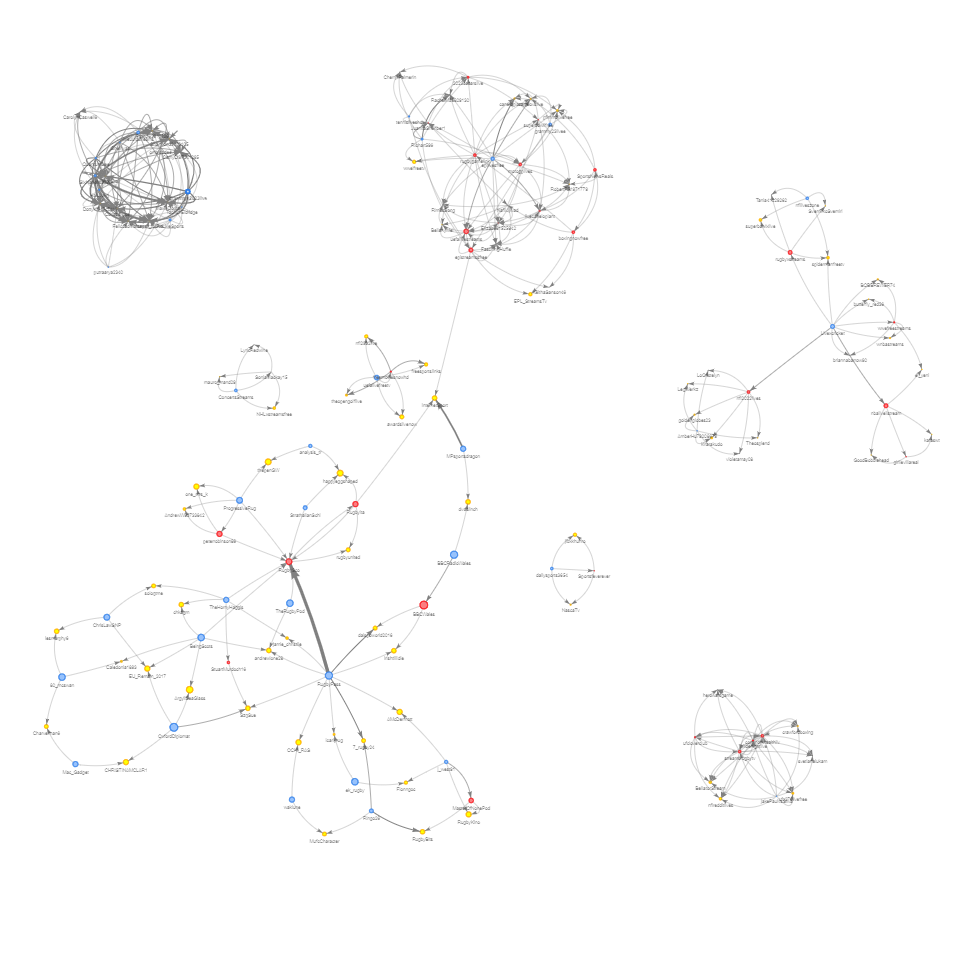

In [ ]:
Image(filename='/content/drive/MyDrive/DSM-160/#SixNations2023 V3.png',width=1000,height=1000)

_Percentage of users remaining: 8_ \
_Percentage of links remaining: 19_

##### Figure 1.6.1.2: '#Eurovision2023' 2-core graph

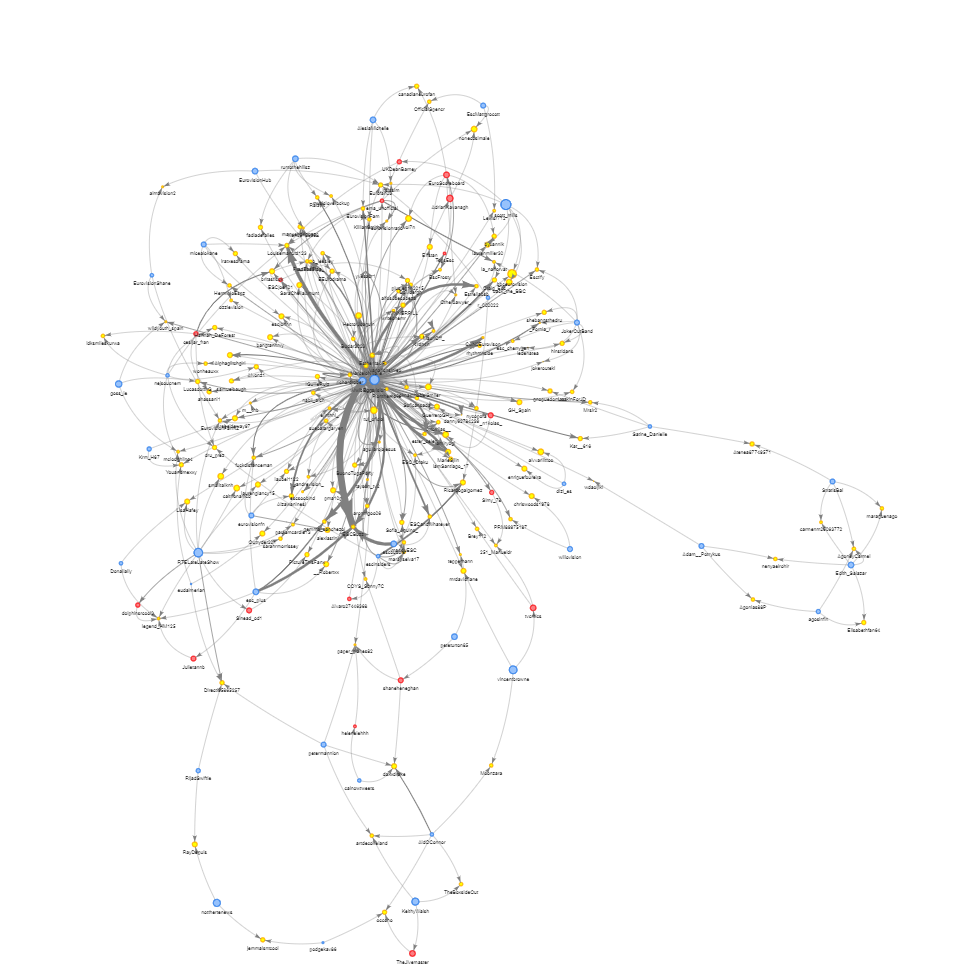

In [ ]:
Image(filename='/content/drive/MyDrive/DSM-160/#Eurovision2023 V3.png',width=1000,height=1000)

_Percentage of users remaining: 9_ \
_Percentage of links remaining: 16_

##### Figure 1.6.1.3: '#ChinaSpyBalloon' 2-core graph

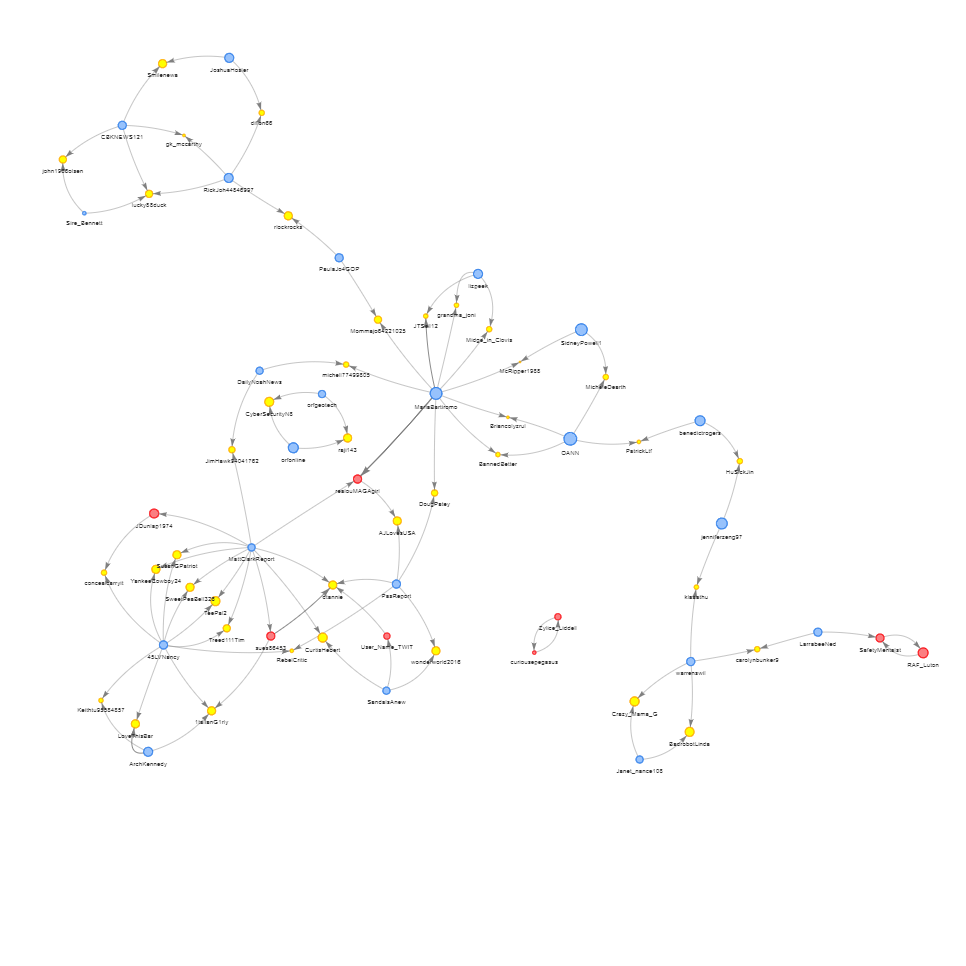

In [ ]:
Image(filename='/content/drive/MyDrive/DSM-160/#ChinaSpyBalloon V3.png',width=1000,height=1000)

_Percentage of users remaining: 2_ \
_Percentage of links remaining: 3_

##### Figure 1.6.1.4: '#NursesStrike' 4-core graph

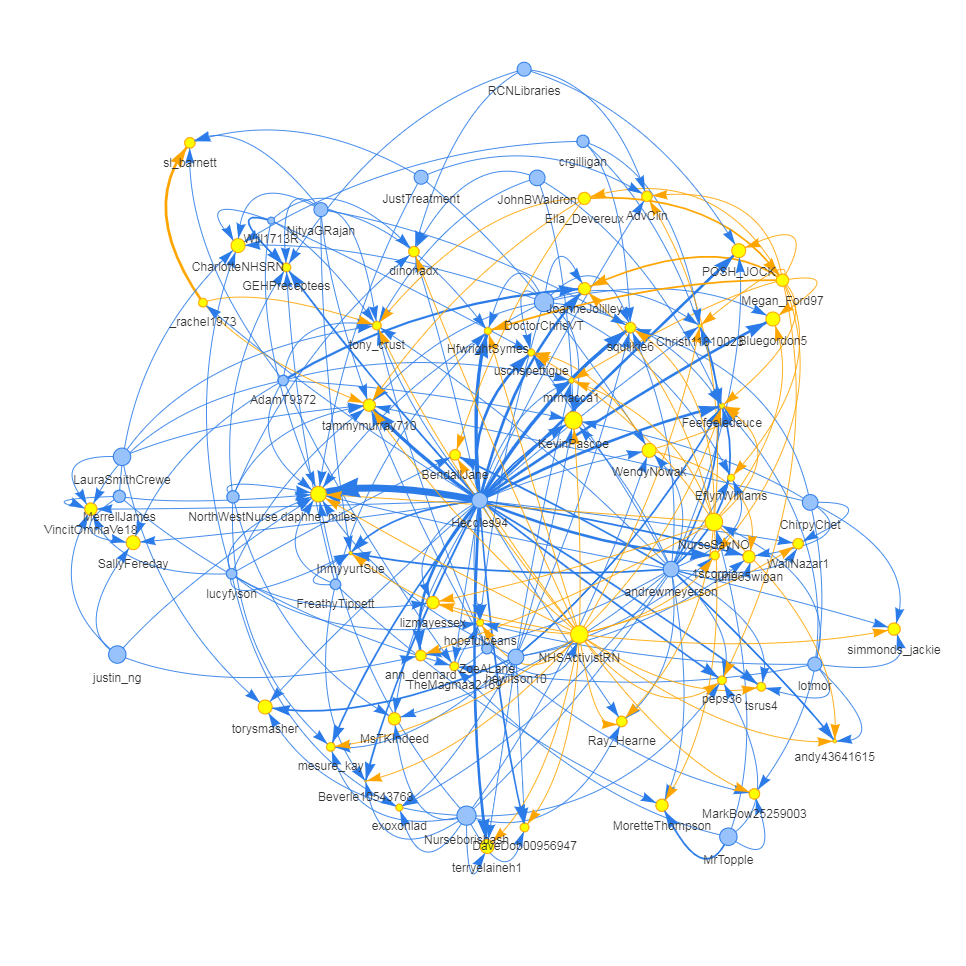

In [ ]:
Image(filename='/content/drive/MyDrive/DSM-160/#NursesStrike_core4.png',width=1000,height=1000)

_Percentage of users remaining: 5_ \
_Percentage of links remaining: 12_

##### Figure 1.6.1.5: '#bard' 2-core graph

Note here:\
Blue node = users who are both retweeted and retweeters\
Red node = users who are only retweeted

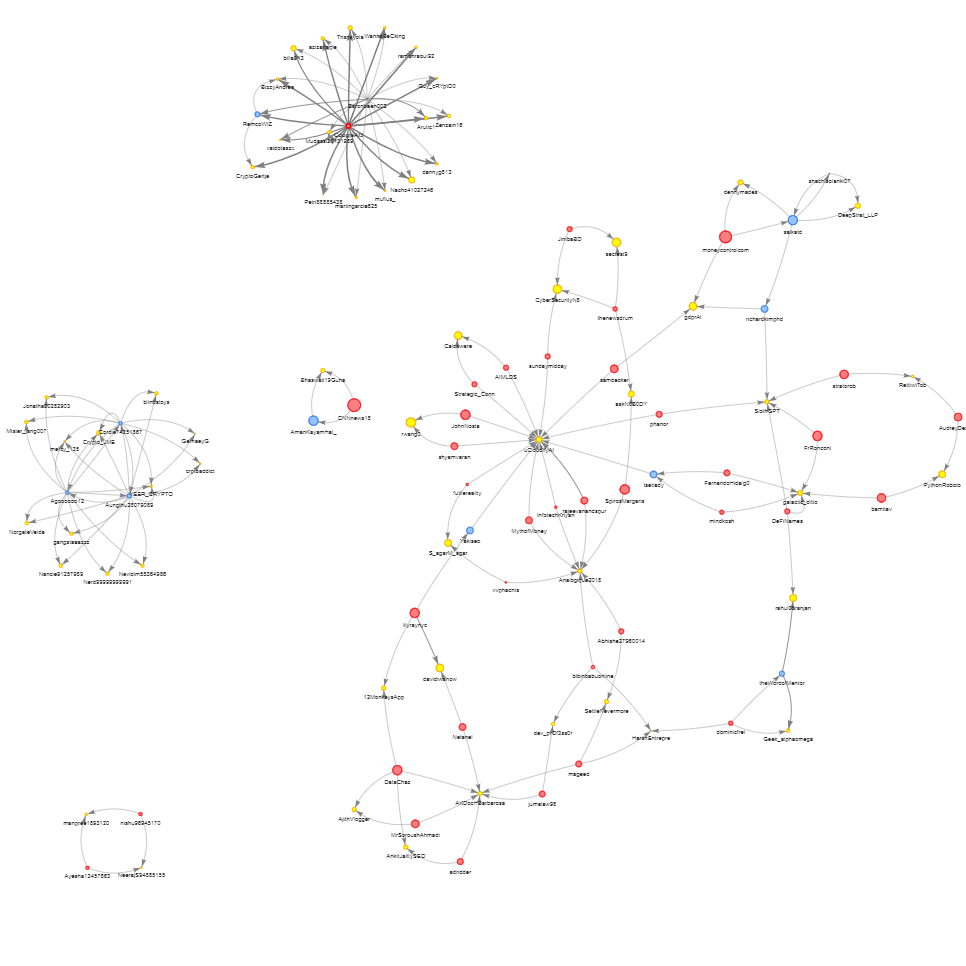

In [ ]:
Image(filename='/content/drive/MyDrive/DSM-160/#bard V3.png',width=1000,height=1000)

_Percentage of users remaining: 5_ \
_Percentage of links remaining: 8_

##### __1.6.2 Derive network metrics__

Using the network graphs created above a selection of key metrics can be calculated to compare the network structures of each hashtag using network science techniques. The following themes group the metrics calculated for each network.

a. _Network size_

Comparing the size of each network enables understanding on much engagement each hashtag conversation has attracted. We can measure the size of each network by the numbers of its users (nodes) and relationships (directed links). Also networks may differ in the proportions of users who are retweeters or users who are retweeted. The metrics considered here are:

1. Number of nodes (users)
2. Number of directed links (relationships)
3. Percentage of users who are retweeters
4. Percentage of users who are retweeted

b. _Network connectivity_

Understanding how well connected a network is informs us of how well information could be diffused across it. Some networks may be more dense meaning information can travel to more users while other networks may be more disjointed, comprising separate communities such as echo chambers. In the latter a visualization of a suitable k-core decomposition of the network can help to reveal the structure of its main components. The metrics considered here are:

1. Density of network
2. Average clustering coefficient
3. Assortativity coefficient
4. Identification of network being strongly connected
5. Number of strongly connected components
6. Number of nodes in largest strongly connected component
7. Identification of network being weakly connected
8. Number of weakly connected components
9. Number of nodes in largest weakly connected component
10. Average shortest path length of largest weakly connected component
11. Plot of k-core decomposition and identifying hubs, cliques, echo chambers

c. _Node information diffusion_

Users can retweet various numbers of other users. This information, along with the number of followers of each user has, enables comparisons of networks in terms of their proportion of influencial users and possible bots. Another comparison can be to compare centrality diffusion scores to see if some networks comprise more key users than others. The metrics considered here are:

1. Percentile distribution of users by number of followers
2. Percentage of all users with at least 1,000 followers
3. Percentile distribution of users by number of retweets (in-degree strength)
4. Plot of distribution of users by number of retweets (in-degree strength)
5. Plot of complementary cumulative distribution function (CCDF) of users by number of retweets (in-degree strength)
6. Percentile distribution of users by number of tweets retweeted (out-degree strength)
7. Plot of distribution of users by number of tweets retweeted (out-degree strength)
8. Plot of complementary cumulative distribution function (CCDF) of users by number of tweets retweeted (out-degree strength)
9. Heterogeneity kappa parameters for both CCDF plots
10. Centrality measures for top 10 users by in-degree strength, out-degree strength, closeness, betweenness and page rank
11. Top 10 users by number of followers
12. Top 10 users retweeted by out-degree strength
13. Top 10 users retweeting by in-degree strength
14. Percentile distribution of users by virality score (for users with at least 1,000 followers)  

The Python code to derive all of these metrics are in sections 3.2.3 to 3.2.9 and 3.5.2 to 3.5.4 of the appendix.

##### Table 1.6.2.1: Descriptive statistics of each network

In [ ]:
Image(filename='/content/drive/MyDrive/DSM-160/Network stats V3.png',width=1000,height=1000)

Output hidden; open in https://colab.research.google.com to view.

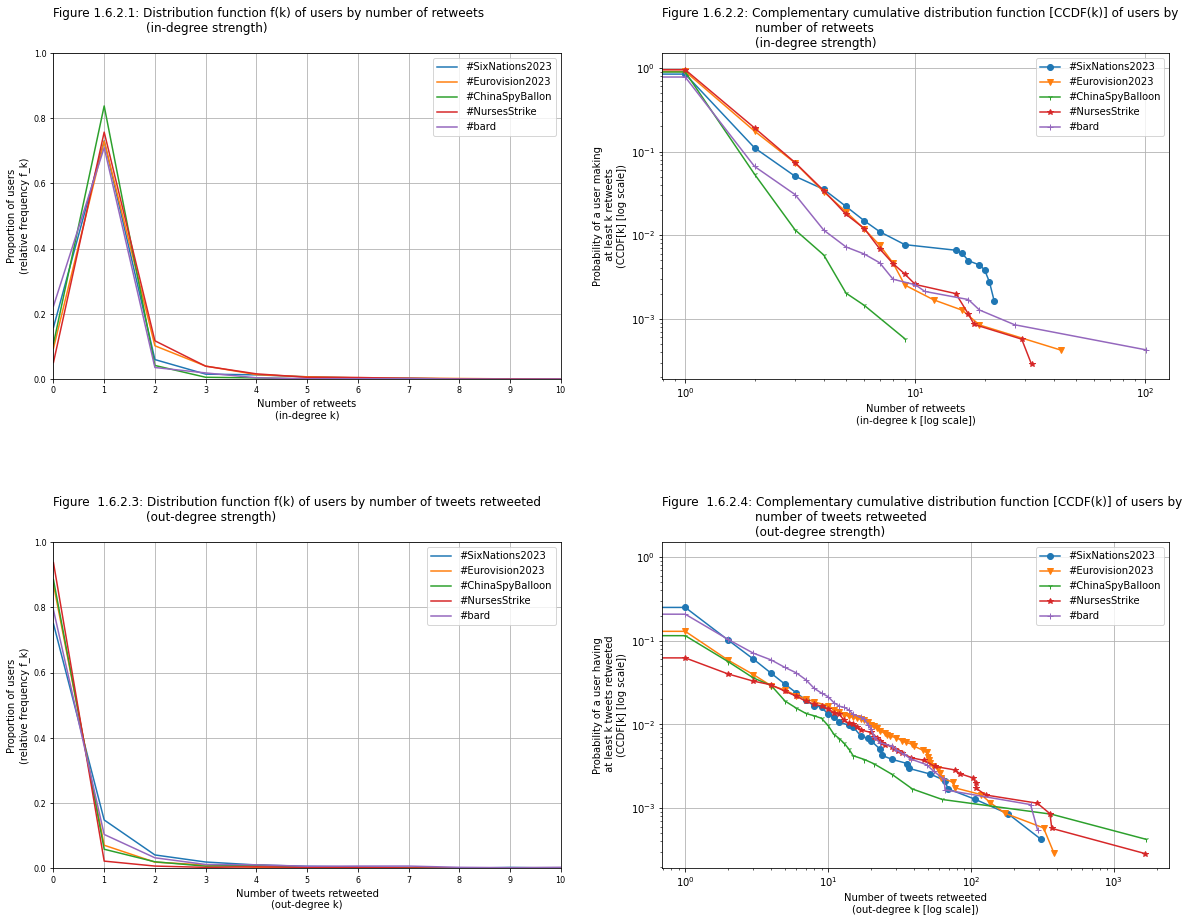

In [ ]:
Image(filename='/content/drive/MyDrive/DSM-160/dist_plots V2.png',width=1000,height=1000)

#### <font color='blue'>1.7. Analysis

__1.7.1 Network size__

Immediately we can see from the network metrics above in Table 1.6.2.1 that there is a significant difference in the size of the networks with the #NursesStrike and #ChinaSpyBalloon conversations having by far the largest number of users - 3.5K users for both compared to 2.4K for both #EuroVision2023 and #bard and 1.8K users for #SixNations2023. This intuitively makes sense given the potential sizes of audience - a pause on NHS services affects most of the UK population while the Six Nations Rugby tournament is a niche sport.

Noticably the metrics show there is an inverse relationship between the numbers of retweeted and retweeter users in each network. Those with the highest proportion of retweeters have the lowest proportion of retweeted users suggesting that in these networks (proportionally) fewer users are generating the retweeted content. In the #NursesStrike conversation 95% of users are retweeters while only 6% of users had their content retweeted whereas for the #bard conversation only 78% of users are retweeters but 25% were retweeted.

__1.7.2 Network connectivity__

The visualizations of the k-core decomposition graphs show very different structures when stripped of their periphery shells and these are also reflected in the network metrics for their full compositions.  Note that these decompositions strip away a significant proportion of user nodes and links - as can be seen in the remaining percentages in the graph figures above. They are all neither strongly or weakly connected networks. The largest strongly connected component in each comprises between only 1 and 4 users. In terms of weakly connected components, the #NursesStrike and #Eurovision2023 networks comprise the fewest number of weakly connected components and their largest weakly connected component comprise 95% and 82% of all their users respectively meaning the majority of these two networks would be fully connected if the graphs were undirected. In comparison the other three networks are made up of significantly more weakly connected components with their largest comprising between only 30% and 59% of all users.

Given these results it is not suprising that all the networks are sparse with densities (proportion of all possible links) and average clustering coefficents [2] (how well followers of users are connected to each other) being very low. Interestingly the #SixNations2023 and #bard networks have the highest clustering coefficients which is reflected by them both having the highest average shortest path length.

The visualizations also show evidence of ego sub-networks and echo chambers in each network, particularly for #SixNations2023 and #bard where the k-core decomposition graphs show standalone components acting as such with significant numbers of users retweeting the content of very few users while excluding all other users. This is possibly a reflection of all the networks being disassortative (with their degree assortativity coefficients being less than 0) meaning that high degree users are connecting to low degree users and conversely low degree users are connecting to high degree users.

__1.7.3 Node information diffusion__

Users in the #SixNations2023, #ChinaSpyBalloon and #NursesStrike all have significantly higher number of followers with an average of 572, 547 and 515 respectively compared to users in the #Eurovision and #bard conversations with only 375 and 267 respectively.

Looking at the in-degree and out-degree strength percentile distributions, on average [1] users retweet just once and do not get retweeted at all. This is reflected in the distribution functions for each (Figure 1.6.2.1 and Figure 1.6.2.3). Only around 5 percent of users retweet or are retweeted more than once for each network. Figure 1.6.2.2 shows heterogeneity in users by number of retweets (in-degree strength), particularly for the #bard conversation which has the heaviest tail (greatest spread in in-degree) while the #ChinaSpyBalloon conversation has the lightest tail (least spread in in-degree). This is reflected by the heterogeneity kappa parameters of 6.8 and 3.2 respectively. Similarly, Figure 1.6.2.4 shows heterogeneity in users by number of tweets retweeted (out-degree strength) with #Eurovision having the heaviest tail with heterogeneity kappa parameter of 811 versus #SixNations2023 having the lightest tail and a kappa paremter of 74. These tails also reflect the number of times the top retweeters of each network retweet (up to 101 times for #bard vs. only 9 times for #ChinaSpyBalloon) and similarly the number of times the top retweeted users are retweeted (e.g. 1,696 for #Eurovision vs. 293 for #SixNations2023). The volume of high frequency retweeter users and retweeted users falls away quickly for each network.

In terms of value to diffusion, while the top 10 retweeters (in-degree strength) tend to be private account users the top 10 retweeted users (out-degree strength) tend to be official or associated representatives of the events (e.g. RugbyPass for SixNations2023 and NHSActivistRN for #NursesStrike) or known celebrities (e.g. Scott Mills) which have by far the largest number of followers (~8M to 18M across the networks). This tends to hold across all of the centrality metrics. The #NursesStrike conversation has the top scores for closeness (how close users are to every other user - in terms of path distance - in the network) but #bard has significantly highest scores for page rank (how each node can be arrived at in terms of information flow).

There are signs of bots in the top 10 lists. It has been summised that usernames followed by 8 digits tend to be bots (Maxwell, 2022) and in this analysis there exists a couple of these in the top 10 for #ChinaSpyBalloon, #Eurovision2023 and #bard conversations across various centrality metrics implying they are acting as important diffusers of either valid information or misinformation. For example, user 'Tsering78393648' is the top retweeter for #ChinaSpyBalloon and 'Directi95865257' is the 5th top retweeter for #Eurovision. Looking at the usernames of retweeted users and retweeter users for the #bard conversation it is quite possible that they are valid information bots which are automatically scheduled by various companies, e.g. 'GoogleAI3', 'SlothGPT' or 'uCloudifyAI'.

In each network there are users that are in both the top 10 users for retweeters and number of followers and can be considered as influencers e.g. 'ScottMills' for #Eurovision2023 or 'DoctorChrisVT' in #NursesStrike. These can be seen in Table 1.6.2.1 above. There is some variation in the virality score percentile distributions of each network (for users with at least 1,000 followers) with #SixNations2023 and #ChinaSpyBalloon having by far the highest scores for top 1% of users. Here virality of a user is calculated as the number of times they have been retweeted divided by the number of their followers, it shows us the penetration of their tweets in their following and is not biased towards users with large or small audiences (followers).

[1] This analysis considers median figures to represent the average of all metrics\
[2] Here we are considering in the calculation users with at least two neighbours, users with non-zero coefficients in the average calculation and excludes self-looping links

#### <font color='blue'>1.8 Summary of findings and conclusions

The observations above in terms of density and not being strongly/weakly connected are to be expected for retweet networks which are defined only by one-way relationships (transmission of tweets from retweeted to retweeter) instead of two-way relationships which occur in social media applications like Facebook. All of the networks differ in size and structure, most notably the number of weakly connected components they have, the heterogeneity in the distribution of their in-degree strength and in terms of centrality scores for the top 10 nodes showing that some networks rely more on some nodes for diffusion of information than others. There is clear evidence of influencers in each network in terms of their high out-degree strength (being retweeted) and their large number of followers as well as some high viral users. There is also indications of bots in action particularly for #ChinaSpyBalloon.

If this analysis was to be repeated, future approaches could include:
- Taking larger data extracts to help ensure data is not biased
- Consider only tweets from verified (blue tick) users to remove nefarious bots or instead checking metadata of each user for clears signs of fake accounts such as absence of photo, links, or any bio information, etc.

## __2. References__

2.1. Ganis, M. and Kohirkar, A., _Social Media Analytics: Techniques and Insights for Extracting Business Value Out of Social Media_, 2015\
2.2. Hootsuite, _160+ Social Media Statistics Marketers Need in 2023_, 2023. Found at: https://blog.hootsuite.com/social-media-statistics-for-social-media-managers/#Twitter_statistics \
2.3. Gold, N., _Using Twitter Data in Research - Guidance for Researchers and Ethics Reviewers_, 2020. Found at: https://www.ucl.ac.uk/data-protection/sites/data-protection/files/using-twitter-research-v1.0.pdf \
2.4. Timothy, M., _How to Spot a Bot on Twitter_, 2022. Found at: https://www.makeuseof.com/how-to-spot-bots-on-twitter/

## __3. Appendix__

Python code used to:
- Undertake tweet data extraction
- Create data model
- Calculate metrics for each network
- Produce visualizations and graphs

#### <font color='blue'>3.1. Set up Python packages

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/DSM-160')

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import math
from statistics import mean
from collections import Counter
import matplotlib.pyplot as plt
from twython import Twython
from twitter_keys import *
import json
from datetime import datetime
import networkx as nx
from pyvis.network import Network
import urllib.request
import warnings
warnings.filterwarnings("ignore")

#### <font color='blue'>3.2 Create user defined functions

##### __3.2.1 Function to extract tweets related to a string search and save in json file__
This UDF was created by adapting various pieces of code used in topic 7 lectures

In [ ]:
def tweets_extract(hash_tag, max_tweets, tweet_mode='extended', result_type='mixed'):

    '''
    Purpose: Create a json file containing tweet data for each tweet extracted from Twitter API relating to the search term
    Input:   Hash tag name (=search term)
             Maximum number of tweets to be captured
             Mode of tweets to be extracted
             Type of tweets to be extracted
    Output:  json file of tweets
             Print out of total tweet count
             Print out of the proportion of tweets in 'extended' mode
             Print out of the proportion of tweets of 'popular' type
    Notes:   As advised:
             - using tweet mode 'extended' to attain full contents of original tweet in retweets
             - using result type 'mixed' to include both both popular and (recent) real time results in the response
    '''

    # Get tweets

    search_tweets = []
    last_id = -1

    while len(search_tweets) < max_tweets:
        new_tweets = twitter.search(q=hash_tag,tweet_mode=tweet_mode,result_type=result_type,count=100,max_id=str(last_id - 1))['statuses']
        if not new_tweets:
            break
        search_tweets.extend(new_tweets)
        last_id = new_tweets[-1]['id']

    # Get tweet counts

    # Count number of tweets in extended mode
    tw_ext_mode = 0
    for tw in search_tweets:
        if ('full_text' in tw):
            tw_ext_mode += 1

    # Count number of popular tweets
    tw_popular = 0
    for tw in search_tweets:
        if (tw['metadata']['result_type']=='popular'):
            tw_popular += 1

    # Output counts
    print(str(hash_tag)+' - no. of tweets'+': ',len(search_tweets))
    print(str(hash_tag)+" - proportion of tweets in 'extended' mode: ",tw_ext_mode/len(search_tweets))
    print(str(hash_tag)+" - proportion of tweets of 'popular' type: ",tw_popular/len(search_tweets))

    # Save in json file

    now = datetime.now()
    str_now = now.strftime("%Y_%m_%d_%H_%M_%S")
    with open(str(hash_tag)+'_tweets_'+str_now+'.json', 'w') as fh:
        json.dump(search_tweets, fh)

    return

##### __3.2.2 Function to create a directed and weighted graph__
This UDF was created by adapting various pieces of code used in topic 7 lectures

In [ ]:
def create_network(json_file):

    '''
    Purpose: Create a networkx graph of retweets completed with nodes, node sizes (number of followers), edges and edge weights
    Input: json file containing tweet data extracted via twitter API
    Output: Networkx graph object for a directed and weighted retweet graph
    Notes: 1. Each retweets represents an edge
           2. Direction of edge reflects information flow from retweeted user to the retweeter
           3. A user can retweet another user more than once resulting in weights representing the strength of information flow
    '''

    # Get saved tweet data
    f=open(json_file)
    tweets_bard_json=json.load(f)

    # Subset to tweets which are retweets
    retweets = []
    for tweet in tweets_bard_json:
        if 'retweeted_status' in tweet:
            retweets.append(tweet)

    # Created a directed and weighted graph
    D = nx.DiGraph()

    for retweet in retweets:

        # Get data of tweet being retweeted
        retweeted_status = retweet['retweeted_status']

        # Create nodes
        # Source: Screen name of user being retweeted
        retweeted_sn = retweeted_status['user']['screen_name']
        # Target: Screen name of user retweeting
        retweeter_sn = retweet['user']['screen_name']

        # Create edges
        # Direction of source to target
        # Weights represent the number of retweets between nodes
        # If edge already exists then add 1 to the weight
        if D.has_edge(retweeted_sn, retweeter_sn):
            D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
        # If edge does not exist create edge and set weight to 1
        else:
            D.add_edge(retweeted_sn, retweeter_sn, weight=1)
            # Create node sizes from number of followers
            D.nodes[retweeted_sn]['followers']=retweeted_status['user']['followers_count']
            D.nodes[retweeter_sn]['followers']=retweet['user']['followers_count']

    return D

##### __3.2.3 Function to compute centrality concepts for top users in a graph__
Original code

In [ ]:
def centrality_measures(graph,num):

    '''
    Purpose: Calculate different centrality measures for each user (node) in a directed weighted graph
    Inputs:  Networkx directed and weighted graph and number of top users to be outputed
    Outputs: Dataframe containing centrality scores of in-degree, out-degree, closeness, betweenness and page rank for the top [num] users respectively
    '''

    indegree=dict(graph.in_degree(weight='weight'))
    indegree_df=pd.DataFrame.from_dict(indegree, orient='index',columns=['In_degree_strength']).sort_index()
    num_indegree_df=indegree_df.sort_values(by='In_degree_strength',ascending=False).reset_index().rename(columns={'index':'In_degree_user'})[:num]

    outdegree=dict(graph.out_degree(weight='weight'))
    outdegree_df=pd.DataFrame.from_dict(outdegree, orient='index',columns=['Out_degree_strength']).sort_index()
    num_outdegree_df=outdegree_df.sort_values(by='Out_degree_strength',ascending=False).reset_index().rename(columns={'index':'Out_degree_user'})[:num]

    closeness=nx.closeness_centrality(graph.reverse(),distance='weight',wf_improved=True)
    closeness_dic={k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse = True)}
    closeness_df=pd.DataFrame.from_dict(closeness_dic, orient='index', columns=['Closeness_centrality']).sort_index()
    num_closeness_df=closeness_df.sort_values(by='Closeness_centrality',ascending=False).reset_index().rename(columns={'index':'Closeness_user'})[:num]

    betweenness=nx.betweenness_centrality(graph.reverse(),weight='weight',normalized=True)
    betweenness_dic={k: v for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse = True)}
    betweenness_df=pd.DataFrame.from_dict(betweenness_dic, orient='index', columns=['Betweenness_centrality']).sort_index()
    num_betweenness_df=betweenness_df.sort_values(by='Betweenness_centrality',ascending=False).reset_index().rename(columns={'index':'Betweenness_user'})[:num]

    pagerank=nx.pagerank(graph, weight='weight')
    pagerank_df=pd.DataFrame.from_dict(pagerank,orient='index',columns=['Page_rank']).sort_index()
    num_pagerank_df=pagerank_df.sort_values(by='Page_rank',ascending=False).reset_index().rename(columns={'index':'Page_rank_user'})[:num]

    centrality_df=pd.concat([num_indegree_df,num_outdegree_df,num_closeness_df,num_betweenness_df,num_pagerank_df], axis=1)

    return centrality_df

##### __3.2.4 Function to calculate all the required graph statistics to enable cross-network comparisons__
Original code

In [ ]:
def get_network_stats(D):

    '''
    Purpose: Calculate different network metrics to enable cross-network comparisons
    Inputs:  A directed and weighted graph
    Outputs: Dictionary containing keys for names of metrics and values comprising metric values
    '''

    # Number of users in graph
    num_users=D.number_of_nodes()

    # Number of directed links in graph
    num_links=D.number_of_edges()

    # Density of graph - considers self-loops
    density=nx.density(D)

    # Distribution of users by number of retweets made of other users' tweets (in-degree based on strength)
    indegree=dict(D.in_degree(weight='weight'))
    indegree_df=pd.DataFrame.from_dict(indegree, orient='index',columns=['In_degree']).sort_index()
    indegree_percs=indegree_df['In_degree'].describe(percentiles=[0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
    indegree_percs_df=pd.DataFrame(indegree_percs).reset_index().drop([0,1,2]).rename(columns={'index':'User_perc'}).reset_index().drop(columns='index',axis=1)

    # Distribution of users by number of retweets made of their tweets (out-degree based on strength)
    outdegree=dict(D.out_degree(weight='weight'))
    outdegree_df=pd.DataFrame.from_dict(outdegree, orient='index',columns=['Out_degree']).sort_index()
    outdegree_percs=outdegree_df['Out_degree'].describe(percentiles=[0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
    outdegree_percs_df=pd.DataFrame(outdegree_percs).reset_index().drop([0,1,2]).rename(columns={'index':'User_perc'}).reset_index().drop(columns='index',axis=1)

    # Percentage of users who are retweeters/retweeted
    perc_users_retweeters=(indegree_df.loc[indegree_df['In_degree']>0].count())/num_users
    perc_users_retweeted=outdegree_df.loc[outdegree_df['Out_degree']>0].count()/num_users

    # Assortativity
    assortativity_coeff=nx.degree_assortativity_coefficient(D,x='out',y='in',weight='weight')

    # Connectivity
    # Strongly connected flag - there is a path from every node to every other node
    strong_conn_flag=nx.is_strongly_connected(D)
    # Number of strongly connected components in network
    strong_conn_num_comps=nx.number_strongly_connected_components(D)
    # Get largest strongly connected component in the network
    strong_conn_comps_max_size=np.max([len(c) for c in sorted(nx.strongly_connected_components(D),key=len, reverse=True)])
    # Weakly connected flag - a directed network is weakly connected if its undirected version is connected
    weak_conn_flag=nx.is_weakly_connected(D)
    # Number of weakly connected components in network
    weak_conn_num_comps=nx.number_weakly_connected_components(D)
    # Get size of largest weakly connected component in the network
    weak_conn_comps_max_size=np.max([len(c) for c in sorted(nx.weakly_connected_components(D),key=len, reverse=True)])

    # Centrality - top 10 nodes by each centrality measure
    centrality=centrality_measures(D,10)

    # Average clustering coefficient - clustering coefficient of a node is the fraction of its neighbour pairs that are connected
    # Here consider:
    # - users with at least two neighbours
    # - users with non-zero coefficients in the average calculation
    # - excludes self-loops
    D_degree_min_2=[n for n in D.nodes() if len(list(nx.all_neighbors(D, n)))>1]
    ave_clust_coeff=nx.average_clustering(D,D_degree_min_2,count_zeros=True,weight='weight')

    # Distribution of number of followers per user
    followers=[]
    for n in D.nodes():
        followers.append(D.nodes[n]['followers'])
    followers_df=pd.DataFrame(followers, columns=['Followers']).sort_index()
    followers_percs=followers_df.describe(percentiles=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.96,0.97,0.98,0.99])
    followers_percs_df=pd.DataFrame(followers_percs).reset_index().drop([0,1,2]).rename(columns={'index':'User_perc'}).reset_index().drop(columns='index',axis=1)

    # Top 10 users by number of followers
    followers_dic={}
    for n in D.nodes():
        followers_dic[n]=D.nodes[n]['followers']
    followers_df1=pd.DataFrame.from_dict(followers_dic,orient='index',columns=['Num_followers']).sort_index()
    num_followers_df=followers_df1.sort_values(by='Num_followers',ascending=False).reset_index().rename(columns={'index':'User'})[:10]

    # Top 10 retweeted users
    top10_retweeted=centrality[['Out_degree_user','Out_degree_strength']]

    # Top 10 retweeter users
    top10_retweeters=centrality[['In_degree_user','In_degree_strength']]

    # Virality measure (no. retweets/no. followers) for those users with at least 1,000 followers

    # Calculate virality score for all users with at least one follower
    retweets_followers_df=pd.merge(outdegree_df,followers_df1,left_index=True,right_index=True).reset_index().rename(columns={'index':'User'})
    retweets_followers_df1=retweets_followers_df.loc[retweets_followers_df['Num_followers']>0]
    retweets_followers_df1['Virality_score']=retweets_followers_df1['Out_degree']/retweets_followers_df1['Num_followers']
    # Get virality scores for users with at least 1,000 followers
    retweets_followers_df2=retweets_followers_df1.loc[retweets_followers_df1['Num_followers']>=1000]
    # Get percentile distribution for users with at least 1,000 followers by virality score
    retweets_followers_percs=retweets_followers_df2['Virality_score'].describe(percentiles=[0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99])
    retweets_followers_percs1=pd.DataFrame(retweets_followers_percs).reset_index().drop([0,1,2]).rename(columns={'index':'User_perc'}).reset_index().drop(columns='index',axis=1)
    # Get percentage of all users with at least 1,000 followers
    retweets_followers_1000_perc=len(retweets_followers_df2)/num_users

    # Average shortest path length of largest weakly connected component - as each graph contains disconnected nodes then can only calculate for largest weakly connected component
    for i in [D_sixn, D_euro, D_chin, D_nurs, D_bard]:
        max_wcc = max(nx.weakly_connected_components(i), key=len)
        max_wcc1 = nx.subgraph(i, max_wcc)
        aspl=nx.average_shortest_path_length(max_wcc1)

    # Store statistics in a dictionary
    dic={}
    dic['num_users']=num_users
    dic['num_links']=num_links  # Links is less than nodes as disconnected graph with many small subgraphs e.g. two nodes and one link
    dic['density']=density
    dic['indegree_percs_df']=indegree_percs_df
    dic['outdegree_percs_df']=outdegree_percs_df
    dic['perc_users_retweeters']=perc_users_retweeters
    dic['perc_users_retweeted']=perc_users_retweeted
    dic['assortativity_coeff']=assortativity_coeff
    dic['strong_conn_flag']=strong_conn_flag
    dic['strong_conn_num_comps']=strong_conn_num_comps
    dic['strong_conn_comps_max_size']=strong_conn_comps_max_size
    dic['weak_conn_flag']=weak_conn_flag
    dic['weak_conn_num_comps']=weak_conn_num_comps
    dic['weak_conn_comps_max_size']=weak_conn_comps_max_size
    dic['centrality']=centrality
    dic['ave_clust_coeff']=ave_clust_coeff
    dic['followers_percs_df']=followers_percs_df
    dic['num_followers_df']=num_followers_df
    dic['top10_retweeted']=top10_retweeted
    dic['top10_retweeters']=top10_retweeters
    dic['retweets_followers_percs']=retweets_followers_percs1
    dic['retweets_followers_1000_perc']=retweets_followers_1000_perc
    dic['ave_short_path_len']=aspl

    return dic

##### __3.2.5 Function to plot graph using pyvis physics engine__
This UDF is an adaption of a UDF used in topic 7 lectures

In [ ]:
def plot_D_pyvis(D, file_path, bln_weighted=False, bln_display_weights=False, height_px='1000px', width_px='1000px'):

    '''
    Purpose: Create a customised networkx graph with a physics engine
    Input:   A directed and weighted graph
    Output:  A visualized network graph with nodes with labels and size attributes, links with direction and weight attributes in a physics engine ready for easy
             format manipulation
    '''

    bln_directed = nx.is_directed(D)

    nt = Network('1000px', '1000px', directed = bln_directed)
    nt.from_nx(D) # Imports graph from networkx
    # nt.nodes is a list of dictionaries
    for n in nt.nodes:
        n['label'] = str(n['label'])

    # nt.edges is a list of dictionaries
    if bln_weighted:
        for e in nt.edges:
            e['value'] = e['weight']
        if bln_display_weights:
            for e in nt.edges:
                e['label'] = str(e['value'])
    if bln_directed and bln_weighted:
        for e in nt.edges:
            e['arrowStrikethrough']=False

    nt.toggle_physics(False) # To avoid initial slow rendering
    # To activate forceAtlas2Based and interaction options
    nt.show_buttons(filter_=['physics', 'interaction'])
    nt.show(file_path)

##### __3.2.6 Function to plot k-core version of graph using pyvis physics engine__
This UDF was adapted from various pieces of code in topic 7 lectures

In [ ]:
def k_core_vis_plot(D,k,hashtag):

    '''
    Purpose: Create a k-core version of a networkx graph to make interpretation easier
    Input:   A directed and weighted graph, hashtag name and the factor to determine which types of user node to exclude (k=1 - order 1 graph, k=2 - order 3 graph, etc)
    Output:  A k-core visualized network graph with nodes with labels and size attributes, links with direction and weight attributes in a physics engine ready for easy
             format manipulation
    '''

    D1=D.copy()

    # Number of users in original graph
    num_users=D1.number_of_nodes()

    # Number of links in graph
    num_links=D.number_of_edges()

    # Remove self loop edges
    D1.remove_edges_from(nx.selfloop_edges(D1))

    # Remove nodes with degree less than k
    D1 = nx.k_core(D1, k)

    # Set all edges to one colour
    for u, v in D1.edges():
        D1.edges[u, v]['color']='grey'

    # Customize node size and colour

    for n in D1.nodes():

        # Set size of node to log(followers)
        followers=D1.nodes[n]['followers']
        node_size=1
        if followers>0:
            node_size=int(math.log(followers))
        D1.nodes[n]['size']=node_size

        # Colour nodes which are retweeted, retweeters or both
        node_in_degree=D1.in_degree(n,weight='weight')
        node_out_degree=D1.out_degree(n,weight='weight')
        # Red for users who are retweeted and also retweet
        if (node_in_degree > 0 and node_out_degree > 0):
            D1.nodes[n]['group']=1
        # Yellow for users who are retweeters only
        elif node_in_degree > 0:
            D1.nodes[n]['group']=2
        # Blue for users who are retweeted only
        else:
            D1.nodes[n]['group']=3

    # Plot graph
    plot_D_pyvis(D1,hashtag+'_retweet_network_k_'+str(k)+'_core.html')

    # Calculate the proportion of nodes and edges remaining in k-core visualization
    print(hashtag)
    print('')
    print('Percentage of users remaining:',round((len(D1.nodes)/num_users),2)*100)
    print('Percentage of links remaining:',round((len(D1.edges)/num_links),2)*100)
    print('')

    return

##### __3.2.7 Function to calculate node degree histogram values (F_k)__
This UDF is copied verbatimly from a piece of code used in topic 5 lectures

In [ ]:
def degree_freqs(degree_sequence, bln_normalised=True):

    '''
    Purpose: Calculate the relative frequencies f(k) for each value k of an attribute of interest (e.g. k=number of neighbours) which can be used as input into a frequency
             distrbution histogram plot
    Input:   An ordered sequence of values of k for each user
    Output:  A series containing k values and a series containing f(k) values
    '''

    degree_counts = Counter(degree_sequence)
    min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
    plot_x = list(range(min_degree, max_degree + 1))
    ncounts = 1
    if bln_normalised:
        # Total number of counts to normalise
        ncounts = sum(degree_counts.values())
    plot_y = [degree_counts.get(x, 0)/ncounts for x in plot_x]
    return plot_x, plot_y

##### __3.2.8 Function to calculate the complementary cumulative probabilities__
This UDF is copied verbatimly from a piece of code used in topic 5 lectures

In [ ]:
def cumulative_prob(degree_sequence):

    '''
    Purpose: Calculate the complementary cumulative probabilities for all users with value k of an attribute of interest (e.g. k=number of neighbours) which can be used as input
             into a CCDF plot
    Input:   An ordered sequence of values of k for each user
    Output:  A dictionary containing the complementary cumulative probability for each k value in aggregate
    '''

    degree_counts = Counter(degree_sequence)
    sorted_degrees = sorted(list(degree_counts))
    N = len(degree_sequence)
    remaining = N
    cumcount = {}
    for d in sorted_degrees:
        cumcount[d] = remaining/N
        remaining -= degree_counts[d]
    return cumcount

##### __3.2.9 Function to calculate heterogeneity kappa parameters__

Original code

In [ ]:
def hetero(D,hashtag):

    '''
    Purpose: Calculate the in-degree and out-degree heterogeneity kappa score metrics
    Input:   Directed and weighted graph and hashtag name
    Output:  A score for each metric
    '''

    # In-degree heterogeneity kappa parameter
    ave_indegree=mean(dict(D.in_degree(weight='weight')).values())
    ave_sqr_indegree=mean([D.in_degree(n,weight='weight')**2 for n in D.nodes()])
    indegree_kappa=ave_sqr_indegree/(ave_indegree**2)

    # Out-degree heterogeneity kappa parameter
    ave_outdegree=mean(dict(D.out_degree(weight='weight')).values())
    ave_sqr_outdegree=mean([D.out_degree(n,weight='weight')**2 for n in D.nodes()])
    outdegree_kappa=ave_sqr_outdegree/(ave_outdegree**2)

    print(hashtag)
    print('')
    print('In-degree : ',indegree_kappa)
    print('Out-degree: ',outdegree_kappa)
    print('')

    return

#### <font color='blue'>3.3 Create Twitter retweet networks

##### __3.3.1 Connect to Twitter API__

In [ ]:
# Use the authentication keys and tokens
twitter = Twython(API_key, API_key_secret, Access_Token, Access_Token_secret)
twitter.verify_credentials()

{'id': 1355456276,
 'id_str': '1355456276',
 'name': 'jason',
 'screen_name': 'groovy__times',
 'location': '',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 1,
 'friends_count': 39,
 'listed_count': 0,
 'created_at': 'Mon Apr 15 22:06:27 +0000 2013',
 'favourites_count': 32,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 8,
 'lang': None,
 'status': {'created_at': 'Sun Mar 19 14:51:56 +0000 2023',
  'id': 1637466943564263424,
  'id_str': '1637466943564263424',
  'text': '@sarajcox I had my house on Tracey Emin. Thank God it was you Sarah.',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'sarajcox',
     'name': 'sara cox💙',
     'id': 33174013,
     'id_str': '33174013',
     'indices': [0, 9]}],
   'urls': []},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',


##### __3.3.2 Extract tweets per hashtag of interest and save as a json file__

In [ ]:
tweets_extract('#SixNations2023',5000)

In [ ]:
tweets_extract('#Eurovision2023',5000)

In [ ]:
tweets_extract('#ChinaSpyBalloon',5000)

In [ ]:
tweets_extract('#NursesStrike',5000)

In [ ]:
tweets_extract('#bard',5000)

##### __3.3.3. Create networks__

In [ ]:
D_sixn=create_network('#SixNations2023_tweets_2023_02_09_00_40_52.json')
D_euro=create_network('#Eurovision2023_tweets_2023_02_09_00_55_52.json')
D_chin=create_network('#ChinaSpyBalloon_tweets_2023_02_09_00_56_28.json')
D_nurs=create_network('#NursesStrike_tweets_2023_02_09_01_11_35.json')
D_bard=create_network('#bard_tweets_2023_02_09_12_34_39.json')

#### <font color='blue'>3.4. Get network statistics

The following statistics were calculated for each network:

a. _Network size_

1. Number of nodes (users)
2. Number of directed links (relationships)
3. Percentage of users who are retweeters
4. Percentage of users who are retweeted

b. _Network connectivity_

1. Density of network
2. Average clustering coefficient
3. Assortativity coefficient
4. Identification of network being strongly connected
5. Number of strongly connected components
6. Number of nodes in largest strongly connected component
7. Identification of network being weakly connected
8. Number of weakly connected components
9. Number of nodes in largest weakly connected component
10. Average shortest path length of largest weakly connected component
11. Plot of k-core decomposition and identifying hubs, cliques, echo chambers

c. _Node diffusion_

1. Percentile distribution of users by number of followers
2. Percentage of all users with at least 1,000 followers
3. Percentile distribution of users by number of retweets (in-degree strength)
4. Plot of distribution of users by number of retweets (in-degree strength)
5. Plot of complementary cumulative distribution function (CCDF) of users by number of retweets (in-degree strength)
6. Percentile distribution of users by number of tweets retweeted (out-degree strength)
7. Plot of distribution of users by number of tweets retweeted (out-degree strength)
8. Plot of complementary cumulative distribution function (CCDF) of users by number of tweets retweeted (out-degree strength)
9. Heterogeneity kappa parameters for both CCDF plots
10. Centrality measures for top 10 users by in-degree strength, out-degree strength, closeness, betweenness and page rank
11. Top 10 users by number of followers
12. Top 10 users retweeted by out-degree strength
13. Top 10 users retweeting by in-degree strength
14. Percentile distribution of users by virality score (for users with at least 1,000 followers)  

##### __3.4.1 Get statistics for each network and store in a dictionary__

In [ ]:
D_sixn_stats=get_network_stats(D_sixn)
D_euro_stats=get_network_stats(D_euro)
D_chin_stats=get_network_stats(D_chin)
D_nurs_stats=get_network_stats(D_nurs)
D_bard_stats=get_network_stats(D_bard)

##### __3.4.2 Review statistics for a network__

In [ ]:
D_sixn_stats

{'num_users': 1816,
 'num_links': 1869,
 'density': 0.0005670440892707613,
 'indegree_percs_df':   User_perc  In_degree
 0       min        0.0
 1       50%        1.0
 2       75%        1.0
 3       90%        1.0
 4       95%        2.0
 5       96%        2.0
 6       97%        3.0
 7       98%        4.0
 8       99%        5.0
 9       max       16.0,
 'outdegree_percs_df':   User_perc  Out_degree
 0       min        0.00
 1       50%        0.00
 2       75%        0.00
 3       90%        2.00
 4       95%        4.00
 5       96%        5.00
 6       97%        7.00
 7       98%        8.70
 8       99%       11.85
 9       max      262.00,
 'perc_users_retweeters': In_degree    0.84141
 dtype: float64,
 'perc_users_retweeted': Out_degree    0.207599
 dtype: float64,
 'assortativity_coeff': -0.249594202809978,
 'strong_conn_flag': False,
 'strong_conn_num_comps': 1810,
 'strong_conn_comps_max_size': 4,
 'weak_conn_flag': False,
 'weak_conn_num_comps': 242,
 'weak_conn_comps_m

##### __3.4.3 Output into Excel via Notepad++__
This was done manually to stop lists from compressing into one cell when using csv.writer.\
Excel was chosen to create tables as it is quicker than converting each metric for each network into a dataframe and merging into tables ready for publishing in the above report.

#### <font color='blue'>3.5 Create network visualizations and plots

The following visualizations and plots are created:
    
- Retweet network graphs
- Retweet network k-core graphs
- Distribution function f(f) of users by number of retweets (in-degree strength)
- Complementary cumulative distribution function [CCDF(k)] of users by number of retweets (in-degree strength)
- Distribution function f(k) of users by number of tweets retweeted (out-degree strength)
- Complementary cumulative distribution function [CCDF(k)] of users by number of tweets retweeted (out-degree strength)

Also, degree heterogeneity kappa parameters are calculated for both in-degree strength and out-degree strength

##### __3.5.1 Retweet network graphs__

Create network graphs with all nodes and edges

Graph key:

- Width of link = number of times a user has retweeted another user
- Size of nodes =  number of its followers
- Red node = users who are both retweeted and retweeters
- Yellow node = users who are only retweeters
- Blue node = users who are only retweeted

In [ ]:
plot_D_pyvis(D_sixn,'#SixNations2023'+'_retweet_network.html')
plot_D_pyvis(D_euro,'#Eurovision2023'+'_retweet_network.html')
plot_D_pyvis(D_chin,'#ChinaSpyBallon'+'_retweet_network.html')
plot_D_pyvis(D_nurs,'#NursesStrike'+'_retweet_network.html')
plot_D_pyvis(D_bard,'#bard'+'_retweet_network.html')

##### __3.5.2 Retweet network k-core graphs__
Create higher order k-core shell visualizations to enable easier interpretation.\
For any given k, all nodes with K-1 neighbours and its related edge are removed.\
The size of k was chosen manually for each hashtag.\
The figures below show the remaining number of nodes and links in the higher order representations.

Graph key:

- Width of link = number of times a user has retweeted another user
- Size of nodes =  number of its followers
- Red node = users who are both retweeted and retweeters
- Yellow node = users who are only retweeters
- Blue node = users who are only retweeted

In [ ]:
k_core_vis_plot(D_sixn,2,'#SixNations2023')
k_core_vis_plot(D_euro,2,'#Eurovision2023')
k_core_vis_plot(D_chin,2,'#ChinaSpyBallon')
k_core_vis_plot(D_nurs,3,'#NursesStrike')
k_core_vis_plot(D_bard,2,'#bard')

#SixNations2023

Percentage of users remaining: 8.0
Percentage of links remaining: 19.0

#Eurovision2023

Percentage of users remaining: 9.0
Percentage of links remaining: 16.0

#ChinaSpyBallon

Percentage of users remaining: 2.0
Percentage of links remaining: 3.0

#NursesStrike

Percentage of users remaining: 5.0
Percentage of links remaining: 12.0

#bard

Percentage of users remaining: 5.0
Percentage of links remaining: 8.0



##### __3.5.3  In-degree and out-degree distribution plots__

Here we plot both the frequency distribution function f(k) and complementary cumulative distribution function CCDF(k) for

- Distribution function f(k) of users by number of retweets (in-degree strength)
- Complementary cumulative distribution function [CCDF(k)] of users by number of retweets (in-degree strength)
- Distribution function f(k) of users by number of tweets retweeted (out-degree strength)
- Complementary cumulative distribution function [CCDF(k)] of users by number of tweets retweeted (out-degree strength)

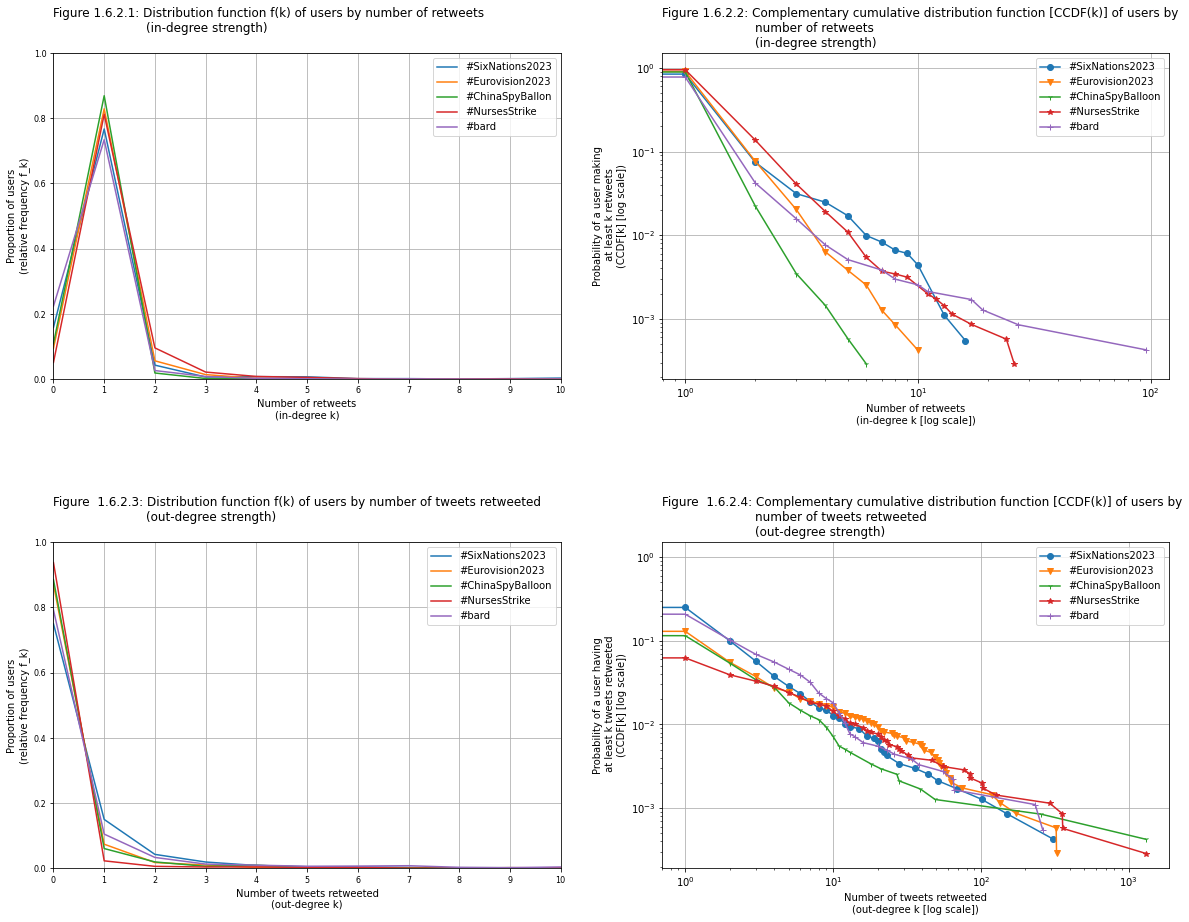

In [ ]:
# Distribution function f(k) of users by number of retweets (in-degree strength)

seq_in_degree1=sorted([D_sixn.in_degree(n,weight='weight') for n in D_sixn.nodes()])
k1, f_k1 = degree_freqs(seq_in_degree1, bln_normalised = True)
seq_in_degree2=sorted([D_euro.in_degree(n,weight='weight') for n in D_euro.nodes()])
k2, f_k2 = degree_freqs(seq_in_degree2, bln_normalised = True)
seq_in_degree3=sorted([D_chin.in_degree(n,weight='weight') for n in D_chin.nodes()])
k3, f_k3 = degree_freqs(seq_in_degree3, bln_normalised = True)
seq_in_degree4=sorted([D_nurs.in_degree(n,weight='weight') for n in D_nurs.nodes()])
k4, f_k4 = degree_freqs(seq_in_degree4, bln_normalised = True)
seq_in_degree5=sorted([D_bard.in_degree(n,weight='weight') for n in D_bard.nodes()])
k5, f_k5 = degree_freqs(seq_in_degree5, bln_normalised = True)

plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 2, 1)
plt.plot(k1,f_k1,label='#SixNations2023')
plt.plot(k2,f_k2,label='#Eurovision2023')
plt.plot(k3,f_k3,label='#ChinaSpyBallon')
plt.plot(k4,f_k4,label='#NursesStrike')
plt.plot(k5,f_k5,label='#bard')
plt.title('Figure 1.6.2.1: Distribution function f(k) of users by number of retweets\n                        (in-degree strength)\n ',fontsize=12, loc='left')
plt.xlabel('Number of retweets\n(in-degree k)',fontsize=10)
plt.ylabel('Proportion of users\n(relative frequency f_k)',fontsize=10)
plt.xticks(ticks=list(range(0,11)),fontsize=8)
plt.yticks(fontsize=8)
plt.xlim((0,10))
plt.ylim((0,1.0))
plt.grid()
plt.legend(loc="upper right")

# Complementary cumulative distribution function [CCDF(k)] of users by number of retweets (in-degree strength)

cum_probs_indegree1=cumulative_prob(seq_in_degree1)
cum_probs_indegree2=cumulative_prob(seq_in_degree2)
cum_probs_indegree3=cumulative_prob(seq_in_degree3)
cum_probs_indegree4=cumulative_prob(seq_in_degree4)
cum_probs_indegree5=cumulative_prob(seq_in_degree5)

plt.subplot(2,2,2)
plt.plot(cum_probs_indegree1.keys(), cum_probs_indegree1.values(), marker='o',label='#SixNations2023')
plt.plot(cum_probs_indegree2.keys(), cum_probs_indegree2.values(), marker='v',label='#Eurovision2023')
plt.plot(cum_probs_indegree3.keys(), cum_probs_indegree3.values(), marker='1',label='#ChinaSpyBalloon')
plt.plot(cum_probs_indegree4.keys(), cum_probs_indegree4.values(), marker='*',label='#NursesStrike')
plt.plot(cum_probs_indegree5.keys(), cum_probs_indegree5.values(), marker='+',label='#bard')
plt.title('Figure 1.6.2.2: Complementary cumulative distribution function [CCDF(k)] of users by\n                        number of retweets\n                        (in-degree strength)', loc='left')
plt.xlabel('Number of retweets\n(in-degree k [log scale])')
plt.ylabel('Probability of a user making\n at least k retweets\n(CCDF[k] [log scale])')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(loc="upper right")

# Distribution function f(k) of users by number of tweets retweeted (out-degree strength)

seq_out_degree1=sorted([D_bard.out_degree(n,weight='weight') for n in D_bard.nodes()])
k1, f_k1 = degree_freqs(seq_out_degree1, bln_normalised = True)
seq_out_degree2=sorted([D_chin.out_degree(n,weight='weight') for n in D_chin.nodes()])
k2, f_k2 = degree_freqs(seq_out_degree2, bln_normalised = True)
seq_out_degree3=sorted([D_euro.out_degree(n,weight='weight') for n in D_euro.nodes()])
k3, f_k3 = degree_freqs(seq_out_degree3, bln_normalised = True)
seq_out_degree4=sorted([D_nurs.out_degree(n,weight='weight') for n in D_nurs.nodes()])
k4, f_k4 = degree_freqs(seq_out_degree4, bln_normalised = True)
seq_out_degree5=sorted([D_sixn.out_degree(n,weight='weight') for n in D_sixn.nodes()])
k5, f_k5 = degree_freqs(seq_out_degree5, bln_normalised = True)

plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 2, 3)
plt.plot(k1,f_k1,label='#SixNations2023')
plt.plot(k2,f_k2,label='#Eurovision2023')
plt.plot(k3,f_k3,label='#ChinaSpyBalloon')
plt.plot(k4,f_k4,label='#NursesStrike')
plt.plot(k5,f_k5,label='#bard')
plt.title('Figure  1.6.2.3: Distribution function f(k) of users by number of tweets retweeted\n                        (out-degree strength)\n ', fontsize=12, loc='left')
plt.xlabel('Number of tweets retweeted\n(out-degree k)',fontsize=10)
plt.ylabel('Proportion of users\n(relative frequency f_k)',fontsize=10)
plt.xticks(ticks=list(range(0,11)),fontsize=8)
plt.yticks(fontsize=8)
plt.xlim((0,10))
plt.ylim((0,1.0))
plt.grid()
plt.legend(loc="upper right")

# Complementary cumulative distribution function [CCDF(k)] of users by number of tweets retweeted (out-degree strength)

cum_probs_outdegree1=cumulative_prob(seq_out_degree1)
cum_probs_outdegree2=cumulative_prob(seq_out_degree2)
cum_probs_outdegree3=cumulative_prob(seq_out_degree3)
cum_probs_outdegree4=cumulative_prob(seq_out_degree4)
cum_probs_outdegree5=cumulative_prob(seq_out_degree5)

plt.subplot(2,2,4)
plt.plot(cum_probs_outdegree1.keys(), cum_probs_outdegree1.values(), marker='o',label='#SixNations2023')
plt.plot(cum_probs_outdegree2.keys(), cum_probs_outdegree2.values(), marker='v',label='#Eurovision2023')
plt.plot(cum_probs_outdegree3.keys(), cum_probs_outdegree3.values(), marker='1',label='#ChinaSpyBalloon')
plt.plot(cum_probs_outdegree4.keys(), cum_probs_outdegree4.values(), marker='*',label='#NursesStrike')
plt.plot(cum_probs_outdegree5.keys(), cum_probs_outdegree5.values(), marker='+',label='#bard')
plt.title('Figure  1.6.2.4: Complementary cumulative distribution function [CCDF(k)] of users by\n                        number of tweets retweeted\n                        (out-degree strength)', loc='left')
plt.xlabel('Number of tweets retweeted\n(out-degree k [log scale])')
plt.ylabel('Probability of a user having\n at least k tweets retweeted\n(CCDF[k] [log scale])')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(loc="upper right");

# Export plots
plt.savefig('dist_plots.png',bbox_inches='tight')

##### __3.5.4  Degree heterogeneity kappa parameters__

Calculate the both in-degree strength and out-degree strength heterogeneity kappa parameters for each network

In [ ]:
hetero(D_sixn,'#SixNations2023')
hetero(D_euro,'#Eurovision2023')
hetero(D_chin,'#ChinaSpyBallon')
hetero(D_nurs,'#NursesStrike')
hetero(D_bard,'#bard')

#SixNations2023

In-degree :  2.0529783768913026
Out-degree:  75.35922678628324

#Eurovision2023

In-degree :  1.3391843081202193
Out-degree:  738.3402128563702

#ChinaSpyBallon

In-degree :  1.1761070622677303
Out-degree:  112.400174763735

#NursesStrike

In-degree :  1.7494471092783206
Out-degree:  435.8025889220123

#bard

In-degree :  6.773915105299114
Out-degree:  75.82769689182958

